In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

Reading the data

In [4]:
train = pd.read_csv('C:/Users/Naveen Vatsal/Documents/Data/LP/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('C:/Users/Naveen Vatsal/Documents/Data/LP/test_Y3wMUE5_7gLdaTN.csv')

In [325]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [378]:
train.shape

(614, 13)

In [132]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [366]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
categorical_cols = ['Gender','Dependents', 'Married','Education', 'Self_Employed', 'Property_Area','Loan_Status']

In [7]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

In [9]:
categorical_data = train[['Gender','Dependents', 'Married','Education', 'Self_Employed', 'Property_Area','Loan_Status']]
numerical_data = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]

In [10]:
for i in categorical_data:
    train[i].fillna('NA',inplace=True)

In [11]:
for i in categorical_cols:
    z = categorical_data[i].value_counts()
    print(z)
    print('='*40)

Male      489
Female    112
Name: Gender, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [290]:
categorical_data.isna().sum()

Gender           13
Married           3
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

Missing values for the gender can be replace with mode as it is obvious
Married or unmarried can be replaced my mode
Self-employed should not be replace directly with mode, median or mean because by observing the data we can draw 
some important relationships and take out a meaning and then replacing the missing values would bring some meaning to the 
data

Lets verify if self-employed has a relation with property_type.

In [31]:
crosstab = pd.crosstab(categorical_data['Property_Area'], categorical_data['Self_Employed'])
crosstab = pd.DataFrame(crosstab)
crosstab

Self_Employed,No,Yes
Property_Area,,
Rural,143,26
Semiurban,191,32
Urban,166,24


In [32]:
crosstab = pd.crosstab(categorical_data['Education'], categorical_data['Self_Employed'])
crosstab = pd.DataFrame(crosstab)
crosstab

Self_Employed,No,Yes
Education,,
Graduate,389,65
Not Graduate,111,17


From the above two tables if we calculate the ratios of % self employed who were graduates and % self employed who were not
graduates were almost came to be the same.
So we cannot actually infer any direct relationship with any of the other columns in the dataset.

So it is quite obvious that we can replace all the missing values of the categorical columns with the respective modes
of the corresponding distribution

In [142]:
#train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
#train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
#train['Married'].fillna(train['Married'].mode()[0], inplace = True)

In [12]:
train['Gender'] = train['Gender'].replace('NA',train['Gender'].mode()[0]) 
train['Self_Employed'] = train['Self_Employed'].replace('NA',train['Self_Employed'].mode()[0]) 
train['Married'] = train['Married'].replace('NA',train['Married'].mode()[0]) 
train['Dependents'] = train['Dependents'].replace('NA',train['Dependents'].mode()[0]) 

In [372]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now coming to numerical columns:

In [153]:
numerical_data.isna().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [170]:
crosstab = pd.crosstab(train['Dependents'], train['Credit_History'])
crosstab = pd.DataFrame(crosstab)
crosstab

Credit_History,0.0,1.0
Dependents,,
0,45,271
1,14,76
2,14,81
3+,11,37


In [220]:
crosstab = pd.crosstab(train['Gender'], train['Credit_History'])
crosstab = pd.DataFrame(crosstab)
crosstab

Credit_History,0.0,1.0
Gender,,
Female,17,84
Male,69,382


In [ ]:
So the % of male who has a credit history '1' is 

In [298]:
#count = 0
#for i in range(len(train[0:])):
#    if (train['Dependents'][i] == '0' or train['ApplicantIncome'][i] == 0 or train['CoapplicantIncome'][i]==0) and (train['Credit_History'][i] == 1):
#                print(i)


In [302]:
#count = 0
#for i in range(len(train[0:])):
#    if (train['Dependents'][i] == '3+') and (train['Credit_History'][i] == 1):
#print(i)


In [ ]:
#Imputing all the missing Credit_History values whose gender is  male with 1

In [320]:
count = 0
for i in range(len(train[0:])):
    if (train['Gender'][i] == 'Male') and np.isnan(train['Credit_History'][i]):
        train['Credit_History'][i] = 1
        count=count+1
print(count)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


39


In [323]:
train[train['Gender'] == 'Female']['Credit_History'].value_counts()

1.0    84
0.0    17
Name: Credit_History, dtype: int64

From the above observation we can infer that the we can simply impute whole of the missing values for Credit_history with 1
which is nothing but the mode
Similarly the Loan amount term can aso be replaced with mode

In [13]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


In [ ]:
Plotting the box plot for Loan Amount

In [327]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

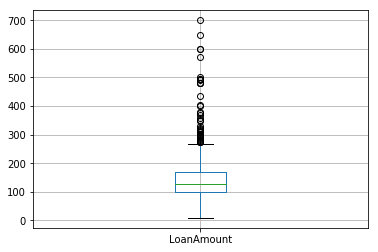

In [326]:
train.boxplot('LoanAmount')

In [14]:

def no_of_outliers(x):
    var = train[train.columns[x]]
    Q1 = var.quantile(0.25)
    Q3 = var.quantile(0.75)
    IQR = Q3 - Q1
    result = ((var < (Q1 - 1.5 * IQR)) | (var > (Q3 + 1.5 * IQR)))
    res = result.value_counts()
    return res[1]

In [15]:
no_of_outliers(8)

39

Treating the Outliers for Credit_History

In [16]:
var = train.LoanAmount
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)
IQR = Q3 - Q1
ub = Q3+1.5*IQR
lb = Q1-1.5*IQR
print(lb,ub)


-2.0 270.0


In [17]:
def outlier_rep(x):
    if x > ub:
        return ub
    
    else:
        return x
    

In [18]:
train['LoanAmount'] = train['LoanAmount'].apply(outlier_rep)

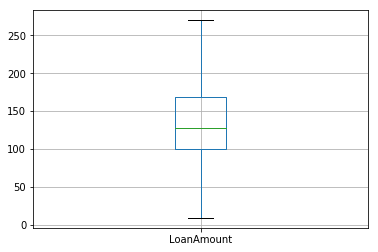

In [338]:
train.boxplot('LoanAmount')

Now treating the missing values for LoanAmounts:

In [31]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)


Checking the outlier for all other numerical columns:

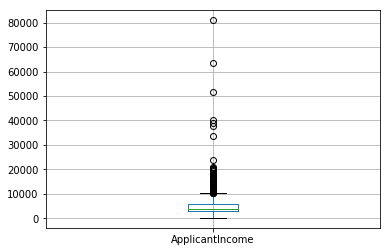

In [345]:
train.boxplot('ApplicantIncome')

In [19]:

def no_of_outliers(x):
    var = numerical_data[numerical_data.columns[x]]
    Q1 = var.quantile(0.25)
    Q3 = var.quantile(0.75)
    IQR = Q3 - Q1
    result = ((var < (Q1 - 1.5 * IQR)) | (var > (Q3 + 1.5 * IQR)))
    res = result.value_counts()
    return res[1]

In [20]:
no_of_outliers(0)

50

In [21]:
var = train.ApplicantIncome
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)
IQR = Q3 - Q1
ub = Q3+1.5*IQR
lb = Q1-1.5*IQR
print(lb,ub)


-1498.75 10171.25


In [22]:
train['ApplicantIncome'] = train['ApplicantIncome'].apply(outlier_rep)

In [355]:
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

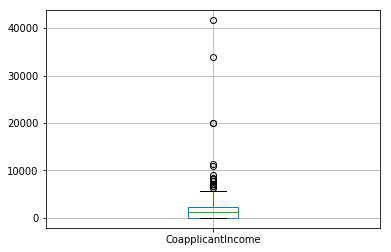

In [356]:
train.boxplot('CoapplicantIncome')

In [357]:
numerical_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [358]:
no_of_outliers(1)

18

In [23]:
var = train.CoapplicantIncome
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)
IQR = Q3 - Q1
ub = Q3+1.5*IQR
lb = Q1-1.5*IQR
print(lb,ub)


-3445.875 5743.125


In [24]:
train['CoapplicantIncome'] = train['CoapplicantIncome'].apply(outlier_rep)

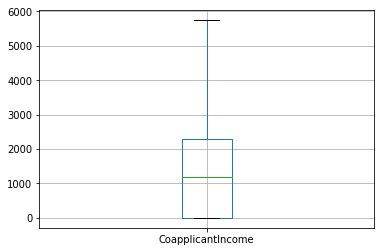

In [361]:
train.boxplot('CoapplicantIncome')

In [25]:
#HashingTechnique
EncodingDictionary = {}
for i in categorical_cols:
    EncodingDictionary[i] = dict(train[i].value_counts())    

In [26]:
EncodingDictionary

{'Gender': {'Male': 502, 'Female': 112},
 'Dependents': {'0': 360, '1': 102, '2': 101, '3+': 51},
 'Married': {'Yes': 401, 'No': 213},
 'Education': {'Graduate': 480, 'Not Graduate': 134},
 'Self_Employed': {'No': 532, 'Yes': 82},
 'Property_Area': {'Semiurban': 233, 'Urban': 202, 'Rural': 179},
 'Loan_Status': {'Y': 422, 'N': 192}}

In [27]:
train = train.replace(EncodingDictionary)

In [28]:
train = train.drop('Loan_ID', axis=1)

In [43]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train['ApplicantIncome'] = train['ApplicantIncome'].astype(int)
train['CoapplicantIncome'] = train['CoapplicantIncome'].astype(int)
train['LoanAmount'] = train['LoanAmount'].astype(int)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype(int)
train['Credit_History'] = train['Credit_History'].astype(int)

In [42]:
train.dtypes

Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int32
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        int64
Loan_Status          int64
dtype: object

In [ ]:
y = train['Loan_Status']
x = train.drop('Loan_Status', axis=1)

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=614, n_features=12, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Automatically created module for IPython interactive environment


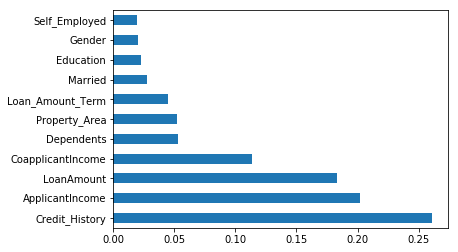

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')

In [ ]:
#Omitting the features self_employed and gender

In [45]:
X_data = train[['Married', 'Dependents', 'Education','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [46]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

best_models = []
best_models.append(('LR', LogisticRegression()))
best_models.append(('DecisionTree', DecisionTreeClassifier()))
best_models.append(('RandomForest', RandomForestClassifier()))
best_models.append(('GradientBoost', GradientBoostingClassifier()))
best_models.append(('XGB', xgb.XGBClassifier()))
best_models.append(('SupportVector', SVC()))
results = []
names = []
for name, model in best_models:
    kfold = StratifiedKFold(n_splits=5, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, X_data, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.682420 (0.013337)
DecisionTree: 0.718193 (0.025554)
RandomForest: 0.783380 (0.008462)
GradientBoost: 0.781741 (0.021631)
XGB: 0.754112 (0.013321)
SupportVector: 0.687298 (0.003687)


In [ ]:
# *Never use accuracy(because of accuracy paradox). F1-Score, ROC _AUC, Balanced Accuracy

In [ ]:
#We will tune our hyperparameters using gridsearch cv using Random forst and Gradient boosting classifier

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting
print(x_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

(491, 9) (491,)
(123, 9) (123,)


In [52]:
# GridSearch for hyper parameter tuning of GBR
#from sklearn.model_selection import StratifiedKFold
from sklearn import ensemble
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "loss"  : ['deviance', 'exponential'],
    #"min_samples_split" : [2,5,7],
    "min_impurity_decrease" : [0,1,2],
    "min_impurity_split" : [1e-7, 1e-3, 1],
    #"ccp_alpha" : [5,10],
    "learning_rate" : [0.1,0.3,0.7],
    #"loss" : ['ls','lad'],
    "max_depth" : [1,3,7],
    "max_features" : [3,7,9],
    #"verbose" : [0,1],
    #"n_estimators" : [100,200,300],
    "tol" : [1e-4,1e-2,1],
    #"validation_fraction" : [0.01,0.1,0.5]
}

gbr = GradientBoostingClassifier()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=7)
en_classifier = GridSearchCV(gbr, parameters, verbose = 1, scoring ='accuracy', cv = kfold)
en_classifier.fit(x_train, y_train)
print("Best: %f using %s " %(en_classifier.best_score_, en_classifier.best_params_))

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.816698 using {'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 3, 'max_features': 3, 'min_impurity_decrease': 1, 'min_impurity_split': 0.001, 'tol': 1} 


[Parallel(n_jobs=1)]: Done 7290 out of 7290 | elapsed:  4.8min finished


In [55]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,fbeta_score,make_scorer,balanced_accuracy_score,roc_auc_score,roc_curve,negative log loss

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate= 0.3, loss= 'exponential', max_depth= 3, max_features= 3,min_impurity_decrease=1, min_impurity_split=0.001, tol=1)
clf.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='exponential', max_depth=3,
                           max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=1, min_impurity_split=0.001,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=1,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
y_pred = clf.predict(x_test)

In [62]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(recall_score(y_test,y_pred,average='weighted'))
print(f1_score(y_test,y_pred,average='weighted'))

              precision    recall  f1-score   support

         192       0.80      0.36      0.50        33
         422       0.81      0.97      0.88        90

    accuracy                           0.80       123
   macro avg       0.80      0.67      0.69       123
weighted avg       0.80      0.80      0.78       123

[[12 21]
 [ 3 87]]
0.8048780487804879
0.7771618625277162


0.8048780487804879

In [ ]:
# GridSearch for hyper parameter tuning of GBR
#from sklearn.model_selection import StratifiedKFold
from sklearn import ensemble
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    "C"  : [1.0,2.0,3.0],
    "kernel":['rbf']#,'linear','poly','sigmoid'],
    "degree" : [3,5,7],
    "gamma" : [0.1,0.9],
   # "decision_function_shape": ['ovo','ovr'],
     "tol" : [1e-4,1e-2,1],
    "coef0" :[0.0,0.1,0.3]
    #"min_samples_split" : [2,5,7],
    #"min_impurity_decrease" : [0,1,2],
    #"min_impurity_split" : [1e-7, 1e-3, 1],
    #"ccp_alpha" : [5,10],
    #"learning_rate" : [0.1,0.3,0.7],
    #"loss" : ['ls','lad'],
    #"max_depth" : [1,3,7],
    
    #"max_features" : [3,7,9],
    #"verbose" : [0,1],
    #"n_estimators" : [100,200,300],
   
    #"validation_fraction" : [0.01,0.1,0.5]
    
}

svc = SVC()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=7)
svc = GridSearchCV(svc, parameters, verbose = 1, scoring ='accuracy', cv = kfold)
svc.fit(x_train, y_train)
print("Best: %f using %s " %(svc.best_score_, svc.best_params_))

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
